In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
from scipy import stats
from sklearn import linear_model
%matplotlib inline

In [3]:
pwd

'C:\\Users\\Dell'

In [4]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\Car_sale_ads.csv")

In [5]:
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [6]:
df.shape

(208304, 25)

In [7]:
#Exploring dataset info(data type,null and non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [8]:
# count  unique values in each column
print(df.nunique())

Index                      208304
Price                       14142
Currency                        2
Condition                       2
Vehicle_brand                 108
Vehicle_model                1203
Vehicle_version             19056
Vehicle_generation            569
Production_year                92
Mileage_km                  52007
Power_HP                      573
Displacement_cm3             1181
Fuel_type                       8
CO2_emissions                 372
Drive                           5
Transmission                    2
Type                            9
Doors_number                   10
Colour                         14
Origin_country                 37
First_owner                     1
First_registration_date      8441
Offer_publication_date         41
Offer_location              13635
Features                   177211
dtype: int64


In [9]:
#There is 270 car listed in euro
df["Currency"].value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

In [10]:
#Transorm each car listed in euro to be listed in PLN
euro_Pln=4.7
df['Price'] = np.where(df['Currency'] == 'EUR',df['Price'] * euro_Pln,df['Price'])
df['Currency'] = np.where(df['Currency'] == 'EUR',"PLN",df['Currency'])

In [11]:
#All currencies become in PLN
df["Currency"].value_counts()

PLN    208304
Name: Currency, dtype: int64

<AxesSubplot:>

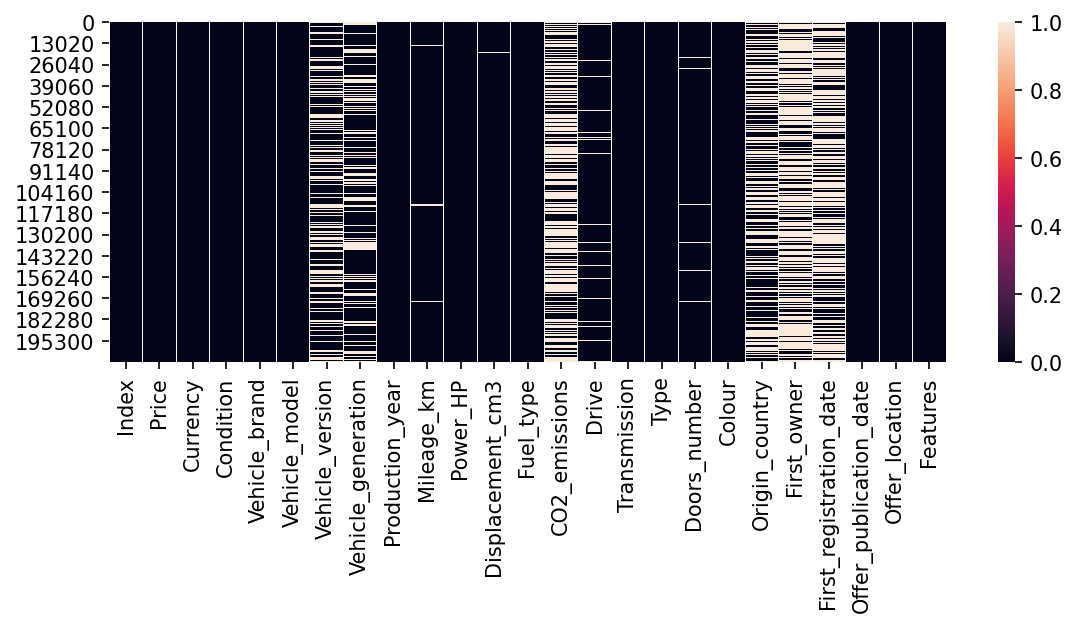

In [12]:
# Exploring null values
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())
#  many null values on 
# 'Vehicle_version',
# 'Vehicle_generation',
# 'CO2_emissions',
# 'Origin_country',
# 'First_owner',
# 'First_registration_date'

In [13]:
# We can inspect these dataset to see the number of null/ notnull/ how to fill the null and so on. 
null_values = df.isnull().sum()
null_values
#  many null values on 
# 'Vehicle_version',
# 'Vehicle_generation',
# 'CO2_emissions',
# 'Origin_country',
# 'First_owner',
# 'First_registration_date'

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [14]:
# see null values percentage from the entire data. 
df.shape
data_count = np.product(df.shape)
(null_values.sum()/data_count)*100

11.917543590137491

In [15]:
#DROP columns that have a lot of null values (30% of the data or more),and save it in df2
df2=df.drop(['Vehicle_version', 'Vehicle_generation','CO2_emissions','Origin_country','First_owner','First_registration_date'], axis=1)

# In the following part, i will impute all the null values at the rest of the coloumns

In [16]:
df2.isnull().sum()

Index                         0
Price                         0
Currency                      0
Condition                     0
Vehicle_brand                 0
Vehicle_model                 0
Production_year               0
Mileage_km                  983
Power_HP                    643
Displacement_cm3           1966
Fuel_type                     0
Drive                     15076
Transmission                479
Type                          0
Doors_number               1487
Colour                        0
Offer_publication_date        0
Offer_location                0
Features                      0
dtype: int64

In [17]:
# see null values percentage from the entire data. 
((df2["Drive"].isnull()).sum()/df.shape[0])*100

7.2374990398648125

<AxesSubplot:ylabel='Index'>

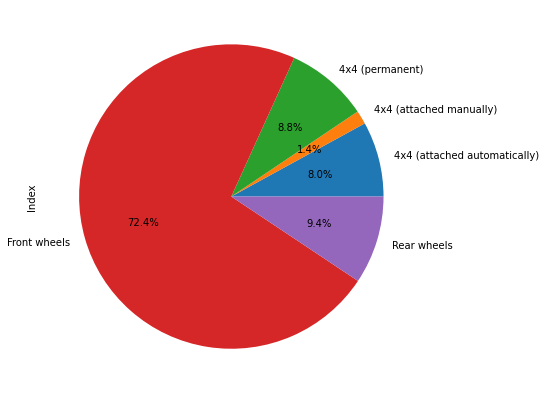

In [18]:
#Visualzing Drive attribute,Most listed cars are frontwheels
df2.groupby('Drive')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

In [19]:
#73 of cars are front_wheels,and cars are by brand and models are ordered,then forward fill will be suitble for this data type
df2['Drive'].ffill(inplace=True)

In [20]:
df2.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 983
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Drive                        0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

In [21]:
#Exploring mileage_km null values,they are all new cars,so we can impute them by zero
df2[df2["Mileage_km"].isnull()]["Condition"].value_counts()

New    983
Name: Condition, dtype: int64

In [22]:
#Imputing milage_km for new cars with fixed value(0)
df2['Mileage_km'] = np.where(df2['Condition'] == 'New',0,df2['Mileage_km'])

In [23]:
#Let impute doors_number
df2.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                   0
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Drive                        0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

<AxesSubplot:xlabel='Doors_number'>

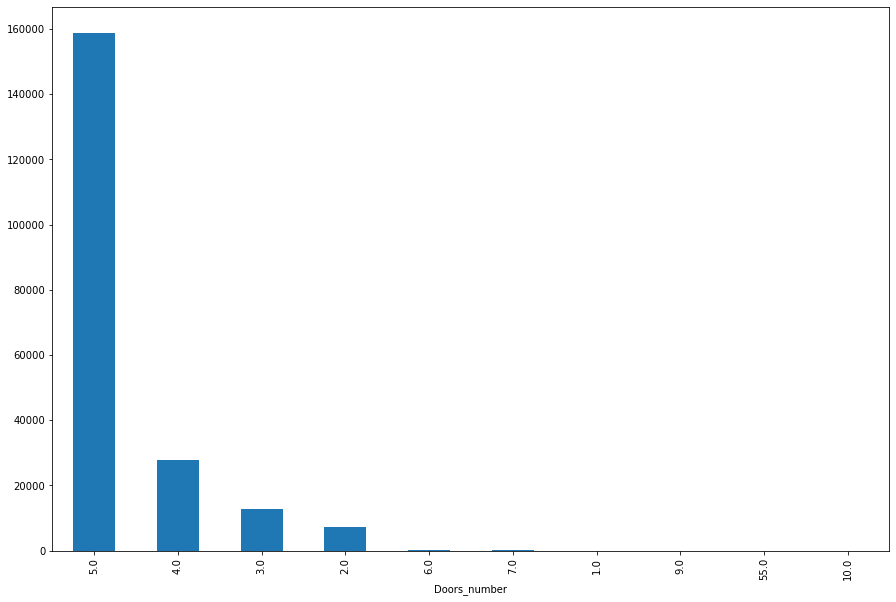

In [24]:
#Visualize Doors_number data distribution
df2.groupby('Doors_number')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))

In [25]:
#Execluding outliers from Doors_number(doors smaller than 7 and bigger than 1)
options = [2,3,4,5,6]
df2=df2[df2['Doors_number'].isin(options)]
Cleared_door_data=df2
Cleared_door_data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200.0,PLN,New,Abarth,595,2021,0.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500.0,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900.0,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Front wheels,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900.0,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900.0,PLN,New,Abarth,595,2021,0.0,165.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208298,208298,26000.0,PLN,Used,Zastava,750,1978,6000.0,NaN,750.0,Gasoline,Front wheels,Manual,small_cars,2.0,white,25/04/2021,"Ostrów Wielkopolski, ostrowski, Wielkopolskie",[]
208300,208300,10900.0,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Rear wheels,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900.0,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,Rear wheels,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700.0,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,Rear wheels,Manual,minivan,2.0,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


<AxesSubplot:xlabel='Doors_number'>

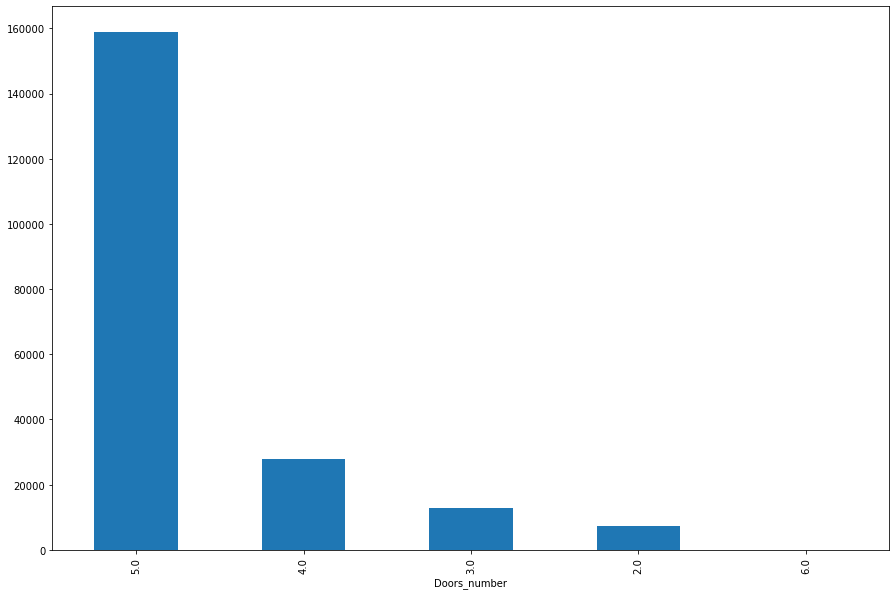

In [26]:
#Visualize Doors_number data distribution after execluding outliers
Cleared_door_data.groupby('Doors_number')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))

In [27]:
Cleared_door_data['Doors_number'].mode()

0    5.0
dtype: float64

In [28]:
#We can impute null values in doors_number using mode which is 5
df2['Doors_number'].fillna(5, inplace = True)

In [29]:
#Now,lets impute transmission null values and answer our first research queston
df2.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                   0
Power_HP                   262
Displacement_cm3          1658
Fuel_type                    0
Drive                        0
Transmission               143
Type                         0
Doors_number                 0
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

# Reasearch question1:Is nowadays cars companies are shifting toward automatic transimission than manual transimission?

In [30]:
#Computing num of automatic and manual cars for each year in last 15 years
years=df2["Production_year"].sort_values(ascending=True).unique().tolist()[-15:]
num_of_automatic_cars=[]
num_of_Manual_cars=[]
grp=df2.groupby(['Production_year'])
for i in range(len(years)):
    selected_group = grp.get_group(years[i])
    selected_group[selected_group['Transmission']=='Automatic']
    x=selected_group[selected_group['Transmission']=='Automatic']['Index'].count()
    num_of_automatic_cars.append(x)
for j in range(len(years)):
    selected_group = grp.get_group(years[j])
    selected_group[selected_group['Transmission']=='Manual']
    x=selected_group[selected_group['Transmission']=='Manual']['Index'].count()
    num_of_Manual_cars.append(x)


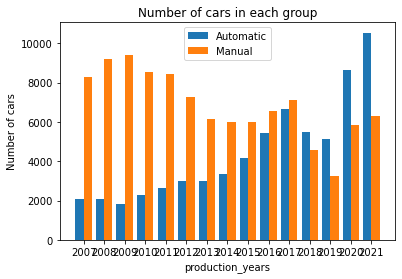

In [31]:
#Yes,car companies are shiffting toward automatic Transmission,as in this graph,automatic cars year after year are increasing
#while manual cars year after year are decreasing
X =years
X1 = num_of_automatic_cars
X2 = num_of_Manual_cars
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, X1, 0.4, label = 'Automatic')
plt.bar(X_axis + 0.2, X2, 0.4, label = 'Manual')
  
plt.xticks(X_axis, X)
plt.xlabel("production_years")
plt.ylabel("Number of cars")
plt.title("Number of cars in each group")
plt.legend()
plt.show()

In [32]:
df2[df2["Transmission"].isnull()]

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
916,916,11900.0,PLN,Used,Alfa Romeo,147,2008,113500.0,120.0,1910.0,Diesel,Front wheels,NaN,compact,5.0,other,27/04/2021,"ul. Szczecińska 11a - 73-108 Morzyczyn, starga...","['ABS', 'Electric front windows', 'Factory rad..."
1328,1328,14900.0,PLN,Used,Alfa Romeo,Mito,2011,176000.0,95.0,1400.0,Gasoline,Front wheels,NaN,compact,3.0,black,28/04/2021,". - 55-300 Środa Śląska, średzki, Dolnośląskie...","['ABS', 'Electric front windows', 'Drivers air..."
1758,1758,15500.0,PLN,Used,Audi,A1,2011,165000.0,NaN,NaN,Diesel,Front wheels,NaN,compact,3.0,blue,24/04/2021,"Luboń, poznański, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."
2885,2885,12900.0,PLN,Used,Audi,A3,2005,295000.0,NaN,NaN,Diesel,Front wheels,NaN,compact,5.0,gray,27/04/2021,"Żywiec, żywiecki, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4042,4042,22900.0,PLN,Used,Audi,A3,2005,129500.0,140.0,1987.0,Diesel,Front wheels,NaN,compact,5.0,gray,28/04/2021,"Warszawa, Mazowieckie, Praga-Południe","['ABS', 'Electric front windows', 'Passengers ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193336,193336,1200.0,PLN,Used,Volkswagen,Passat,1996,414500.0,NaN,NaN,Diesel,Front wheels,NaN,station_wagon,5.0,green,20/04/2021,"Łódź, Łódzkie, Bałuty","['Central locking', 'ABS', 'Passengers airbag'..."
194348,194348,20500.0,PLN,Used,Volkswagen,Passat,2009,292000.0,NaN,NaN,Diesel,Front wheels,NaN,station_wagon,4.0,silver,25/04/2021,"Rzeszów, Podkarpackie",[]
197740,197740,27900.0,PLN,Used,Volkswagen,Scirocco,2009,207000.0,NaN,NaN,Diesel,Front wheels,NaN,coupe,3.0,white,25/04/2021,"Pyzdry, wrzesiński, Wielkopolskie",[]
198186,198186,63999.0,PLN,Used,Volkswagen,Sharan,2015,223200.0,NaN,NaN,Diesel,Front wheels,NaN,minivan,5.0,black,01/05/2021,"Piła, pilski, Wielkopolskie","['ABS', 'Electric front windows', 'Passengers ..."


In [33]:
#Now we can impute Transmission null values by their production year mode
df2["Transmission"] = df2.groupby("Production_year")['Transmission'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [34]:
df2.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                   0
Power_HP                   262
Displacement_cm3          1658
Fuel_type                    0
Drive                        0
Transmission                 0
Type                         0
Doors_number                 0
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

<AxesSubplot:>

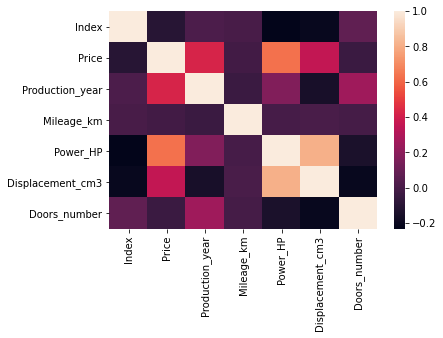

In [35]:
#There is a strong correlation Power_HP and displacement_cm3 sow we can deduce them from each other using linear regression
sns.heatmap(df2.corr())

In [36]:
#Exploring Power_HP when its values are null
Power_null_df=df2[df2["Power_HP"].isnull()]
Power_null_df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
160,160,29900.0,PLN,Used,Aixam,Coupe,2017,32000.0,NaN,480.0,Diesel,Front wheels,Automatic,small_cars,2.0,white,04/05/2021,"ul. Sienkiewicza 31 - 62-400 Słupca, słupecki,...","['Alloy wheels', 'Rear parking sensors', 'Powe..."
196,196,14800.0,PLN,Used,Aixam,Other,2016,11111.0,NaN,400.0,Diesel,Front wheels,Automatic,small_cars,2.0,gray,29/04/2021,"CHORZOWSKA 13 - 30-498 Kraków, Małopolskie (Po...",[]
843,843,10999.0,PLN,Used,Alfa Romeo,159,2006,182000.0,NaN,2200.0,Gasoline,Front wheels,Manual,sedan,5.0,silver,30/04/2021,"Oława, oławski, Dolnośląskie","['ABS', 'Electric front windows', 'Drivers air..."
1758,1758,15500.0,PLN,Used,Audi,A1,2011,165000.0,NaN,NaN,Diesel,Front wheels,Manual,compact,3.0,blue,24/04/2021,"Luboń, poznański, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."
2557,2557,10900.0,PLN,Used,Audi,A3,2010,151000.0,NaN,1600.0,Diesel,Front wheels,Manual,city_cars,3.0,black,03/05/2021,"Środa Wielkopolska, średzki, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199297,199297,126100.0,PLN,New,Volkswagen,Tiguan,2021,0.0,NaN,1968.0,Diesel,Front wheels,Manual,convertible,5.0,black,04/05/2021,"Jabłoniowa 2a - 41-214 Sosnowiec, Śląskie (Pol...",[]
200304,200304,375000.0,PLN,Used,Volkswagen,Touareg,2021,254.0,NaN,2995.0,Hybrid,4x4 (attached automatically),Automatic,SUV,5.0,black,29/04/2021,"ul. Krańcowa 40/42 - 61-037 Poznań, Nowe Miast...","['ABS', 'Parking assistant', 'Bluetooth', 'Fro..."
202158,202158,20900.0,PLN,Used,Volkswagen,up!,2017,117000.0,NaN,NaN,Gasoline,Front wheels,Manual,small_cars,3.0,white,26/04/2021,"Bydgoszcz, Kujawsko-pomorskie","['ABS', 'Electric front windows', 'Factory rad..."
203452,203452,66800.0,PLN,Used,Volvo,XC 60,2015,137000.0,NaN,1984.0,Diesel,4x4 (attached automatically),Manual,SUV,5.0,brown,02/05/2021,"Gniezno - 62-200 Gniezno, gnieźnieński, Wielko...","['ABS', 'Alloy wheels', 'Rain sensor', 'Rear p..."


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


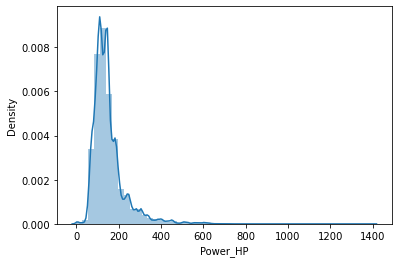

In [37]:
#Visualize Power_HP data distribution
#There are a lot of outliers
ax = sns.distplot(df2['Power_HP'],kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


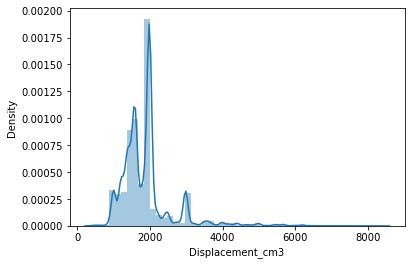

In [38]:
#Visualize Displacement_cm3 data distribution,there are a lot of outliers
ax = sns.distplot(df2['Displacement_cm3'],kde=True)

In [39]:
#Removing outliers in Power_HP and displacement_cm3
df2=df2[np.abs(df2.Power_HP-df2.Power_HP.mean()) <= (3*df2.Power_HP.std())]
df2=df2[np.abs(df2.Displacement_cm3-df2.Displacement_cm3.mean()) <= (3*df2.Displacement_cm3.std())]
Power_HP_cleared_iqr=df2["Power_HP"]
Displacement_cm3_cleared_iqr=df2["Displacement_cm3"]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


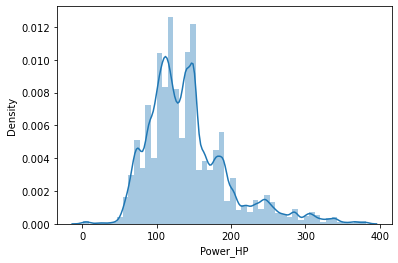

In [40]:
#Visualize Power_HP data distribution after removing outliers
ax = sns.distplot(Power_HP_cleared_iqr,kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


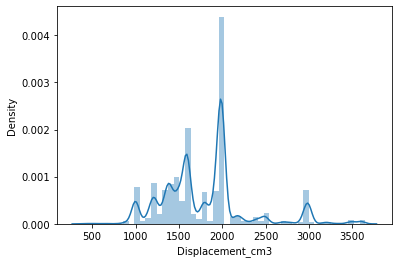

In [41]:
#Visualize Displacement_cm3 data distribution after removing outliers
ax = sns.distplot(Displacement_cm3_cleared_iqr,kde=True)

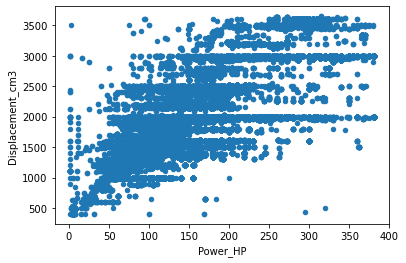

In [42]:
#They have direct relation between each other
df2.plot.scatter(x='Power_HP', y='Displacement_cm3');

In [43]:
df2.isnull().sum()

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Drive                     0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

In [44]:
#We can deduce displacement_cm3 from Power_HP
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# # data prep
# df2 = df2.reset_index(drop=True)
# X = np.array(df2['Power_HP']).reshape(-1, 1)
# y = np.array(df2['Displacement_cm3'])

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
# # Training
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# # Evaluation
# print(f"score: {lin_reg.score(X_test, y_test)}")

In [45]:
#Imputing Displacement_cm3 null values using our linear regression algorethim
# df2['Displacement_cm3'].fillna(df2.Power_HP *lin_reg.coef_+lin_reg.intercept_,inplace=True)

In [46]:
#However there are still null values at diplacement_cm3 column because theser rows have also null values at Power_HP
#Since there is a correlation between price and power_HP,we will deduce the rest of Power_Hp and Displacement_cm3 null values from the Vehicle brand
# df2[df2["Displacement_cm3"].isnull()]

# Research question2:Are brands that have high price points overall has higher Power_HP than brands with lower price points

In [47]:
# Execulding outliers from price
df2=df2[np.abs(df2.Price-df2.Price.mean()) <= (3*df2.Price.std())]

In [48]:
#Df3 is a new dataframe for top 10 car companies
Top10_brands=["Volkswagen","BMW","Audi","Opel","Mercedes-Benz","Renault","Toyota","Škoda","Peugeot","Citroën"]
df3=df2[df2['Vehicle_brand'].isin(Top10_brands)]

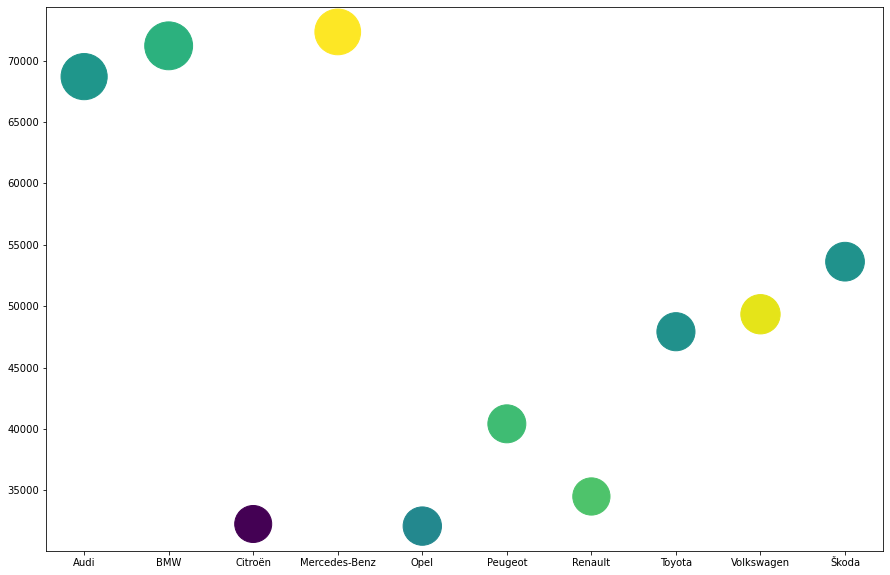

In [49]:
#Visualization between each brand and its mean price and its mean Power_HP
#So we can deduce the rest of Power_HP and displacement_cm3 from Vehicle_brand
#Most brands that have high mean price,has high mean power_HP

Brand_group = df3.groupby('Vehicle_brand')['Price'].mean()
Power_HP_group = df3.groupby('Vehicle_brand')['Power_HP'].mean()
Displacement_group=df3.groupby('Vehicle_brand')['Displacement_cm3'].mean()

Brands = Brand_group.index
Mean_price = Brand_group.values 
plt.figure(figsize=(15,10))
plt.scatter(Brands,Mean_price,s =  Power_HP_group.values*12, c= np.random.randn(len(Power_HP_group.values)))
plt.show()

<AxesSubplot:xlabel='Power_HP', ylabel='Price'>

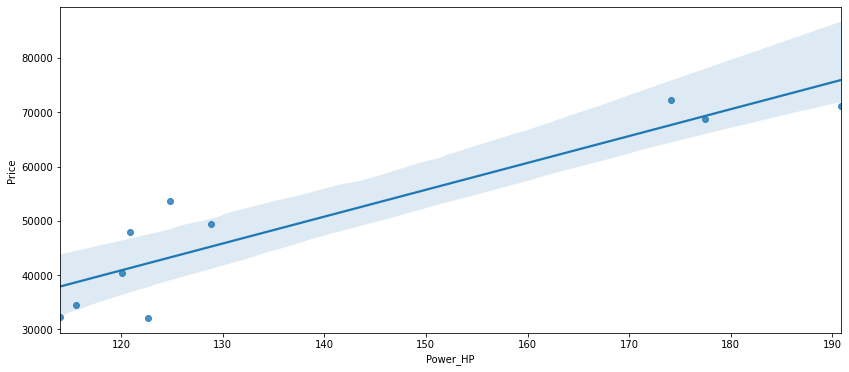

In [50]:
#Another graph that validate this point,Power_Hp and price are correlated
plt.figure(figsize=(14,6))
sns.regplot(x=Power_HP_group, y=Brand_group)

<AxesSubplot:xlabel='Power_HP', ylabel='Displacement_cm3'>

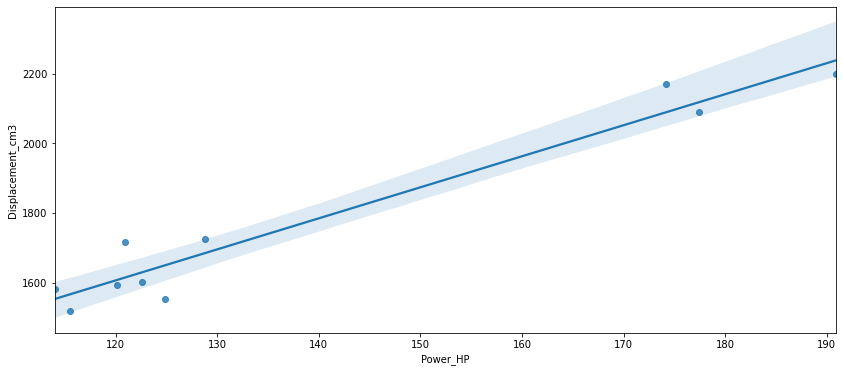

In [51]:
#Correlation between power_hp and price in all data
#Linear relation between Power_hp and Displacement_cm3,whenever Displacement_cm3 increase ,power_hp increase
plt.figure(figsize=(14,6))
sns.regplot(x=Power_HP_group, y=Displacement_group)

In [52]:
#We can impute the rest of the value by their mean according to each brand
#Now we can impute Transmission null values by their production year mode
df2['Displacement_cm3'].fillna(df2.groupby('Vehicle_brand')['Displacement_cm3'].transform('mean'), inplace = True)
df2['Power_HP'].fillna(df2.groupby('Vehicle_brand')['Power_HP'].transform('mean'), inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [53]:
#Now,there is null values in the dataframe
df2.isnull().sum()

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Drive                     0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

In [54]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [55]:
#Make sure that df2 dont have outliers in column Mileage_km
#We already removed outliers from Power_HP and displacement_cm3,Price above
df2=df2[np.abs(df2.Mileage_km-df2.Mileage_km.mean()) <= (3*df2.Mileage_km.std())]

In [56]:
df2=df2.reset_index(drop=True)

<AxesSubplot:xlabel='Vehicle_brand'>

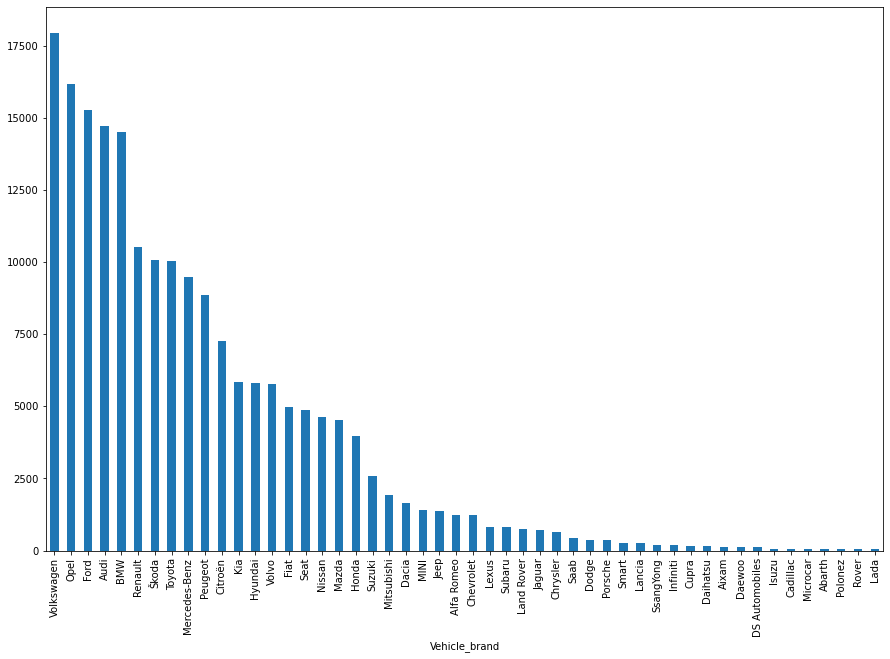

In [57]:
#Order of num of cars by their brands
#volkswagen is the most listed brand
Top10_brands=["Volkswagen","BMW","Audi","Opel","Mercedes-Benz","Renault","Toyota","Škoda","Peugeot","Ford"]
df2.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))

<AxesSubplot:ylabel='Index'>

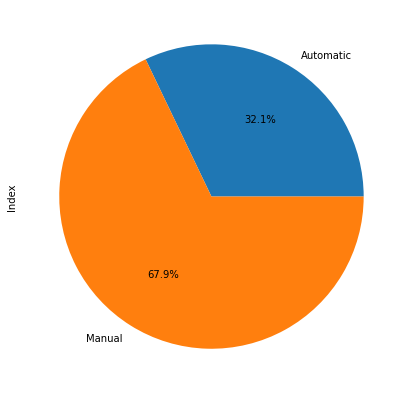

In [58]:
#Most listed cars are manual
df2.groupby('Transmission')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:xlabel='Vehicle_model'>

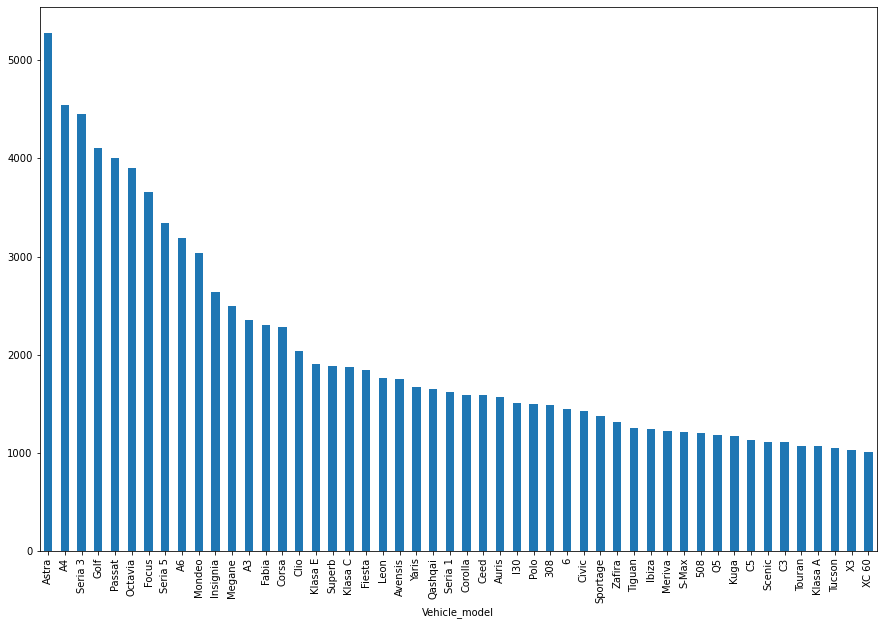

In [59]:
#Order of num of cars by their model
#Astra is the most listed model
df2.groupby('Vehicle_model')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))

<AxesSubplot:ylabel='Index'>

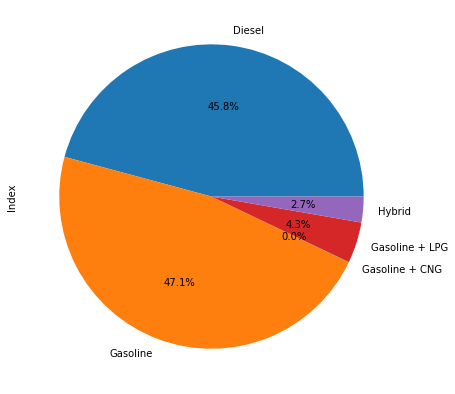

In [60]:
#Most listed cars their fuel type is Diesel or gasoline
df2.groupby('Fuel_type')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:ylabel='Index'>

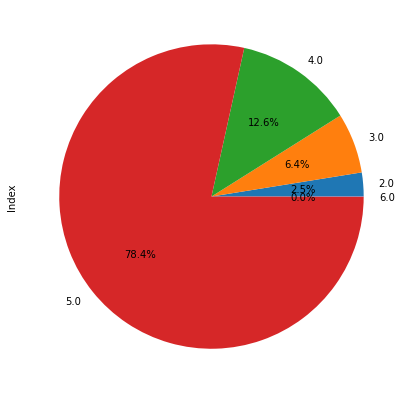

In [61]:
#Most listed cars have 5 doors
df2.groupby('Doors_number')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:>

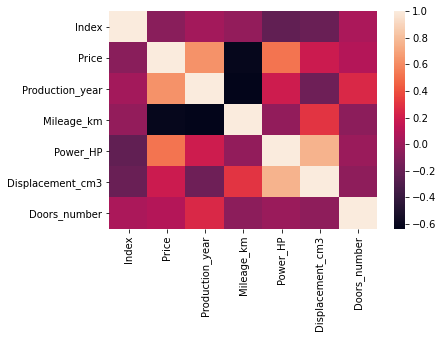

In [62]:
#Correlation between price,production_year,Power_HP
#Correlatoin between Power_hp and displacement
sns.heatmap(df2.corr())

# Research question 3:Are newer cars are more expensive than older cars?

In [63]:
X1=df2.groupby(by="Production_year")["Price"].mean()

<AxesSubplot:xlabel='Production_year'>

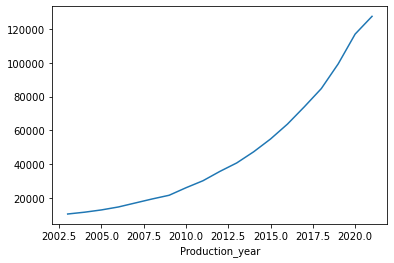

In [64]:
#FROM 2000 to 2020,newer cars are obviously more expensive,however before 2000 there is cars that are more expensive than newer cars
X1[70:].plot()

<AxesSubplot:xlabel='Production_year'>

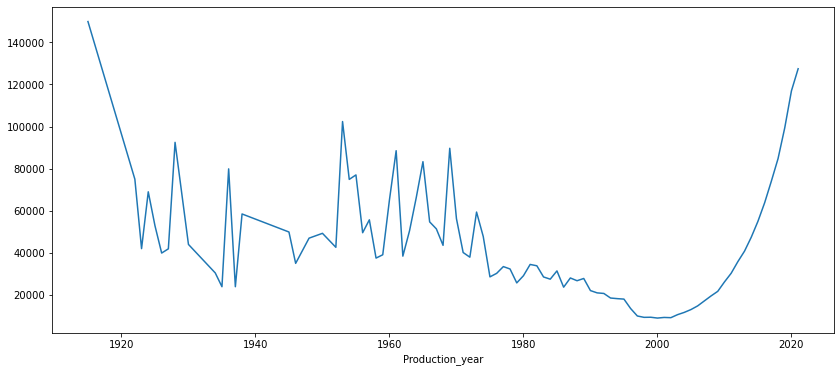

In [65]:
#FROM 2000 to 2020,newer cars are obviously more expensive
#however before 2000,very old cars are too expensive
plt.figure(figsize=(14,6))
X1.plot()

<AxesSubplot:>

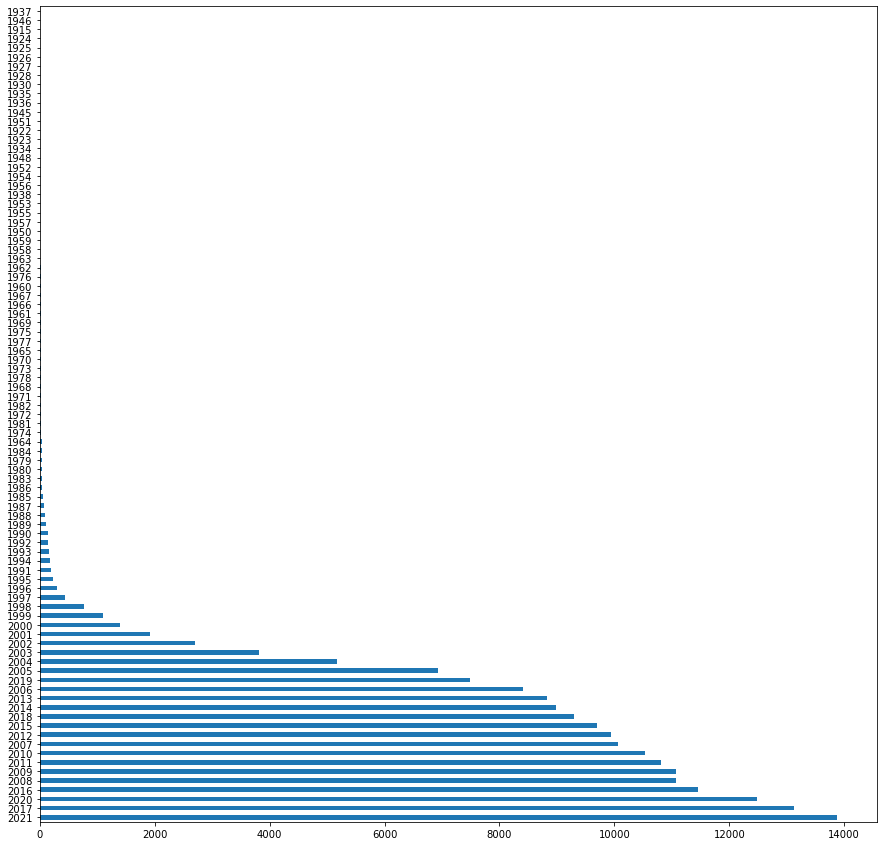

In [66]:
#Exploring num of cars for each production year
plt.figure(figsize=(15,15))
df2["Production_year"].value_counts().plot(kind='barh')

<AxesSubplot:>

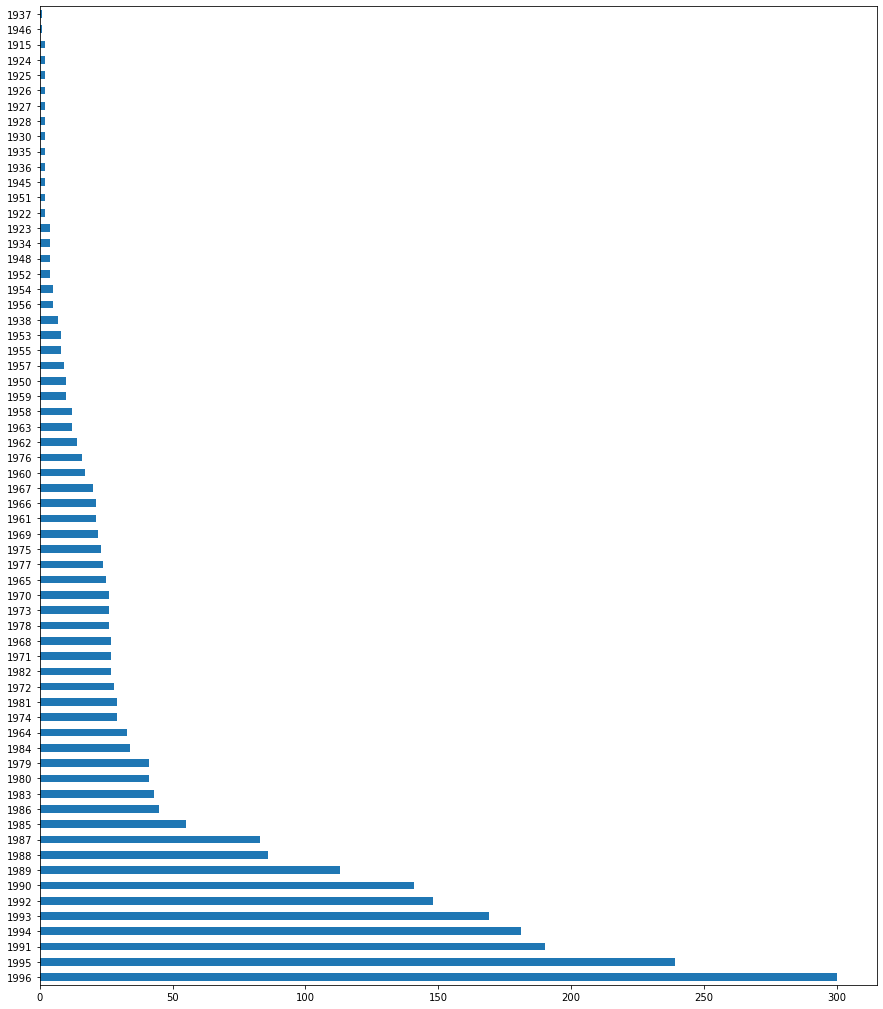

In [67]:
#there is very few cars that are listed,from 1933 to 1996
plt.figure(figsize=(15,18))
df2["Production_year"].value_counts()[25:92].plot(kind='barh')

In [68]:
#From 1933 to 1996,there is only 3376 listed cars,however from 1997 to 2020 there is 204928 listed cars
print(df2["Production_year"].value_counts()[25:92].sum())
print(df2["Production_year"].value_counts()[0:25].sum())

2518
191397


In [69]:
df2["Vehicle_brand"].nunique()

100

In [70]:
#Exploring offer_publication_dates
#All lisiting happened between 27/3/2021 to 4/5/2021
df2["Offer_publication_date"].value_counts()

30/04/2021    24622
03/05/2021    24511
02/05/2021    24154
04/05/2021    23942
29/04/2021    23391
01/05/2021    22908
28/04/2021    12666
26/04/2021    12295
27/04/2021    11255
25/04/2021     9476
24/04/2021     1962
23/04/2021      639
22/04/2021      636
21/04/2021      556
20/04/2021      478
19/04/2021      140
15/04/2021       46
16/04/2021       31
17/04/2021       29
05/05/2021       29
18/04/2021       26
13/04/2021       14
14/04/2021       14
07/04/2021       13
06/04/2021       11
10/04/2021       11
12/04/2021       11
05/04/2021        9
08/04/2021        9
04/04/2021        7
09/04/2021        7
11/04/2021        6
02/04/2021        2
28/03/2021        2
31/03/2021        2
27/03/2021        1
03/04/2021        1
01/04/2021        1
26/03/2021        1
30/03/2021        1
Name: Offer_publication_date, dtype: int64

# Research question4: Are colours affects the car price in each brand?

In [71]:
#I splited the top 10 brands between 2 dataframes so it can be easy visualized
#From visualzions below,yes colours affect the price in each brand

In [72]:
Top5_brands=["Volkswagen","BMW","Audi","Opel","Mercedes-Benz"]
df3=df2
# Q1 = df3.quantile(0.25)
# Q3 = df3.quantile(0.75)
# IQR = Q3 - Q1
# df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3=df3[df3['Vehicle_brand'].isin(Top5_brands)]

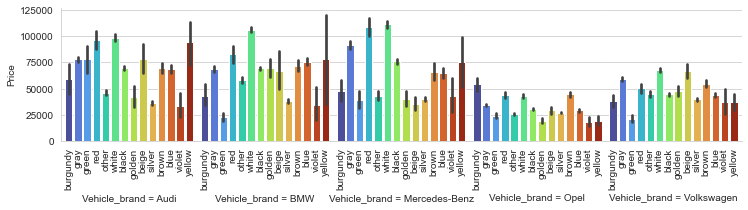

In [73]:
#Yes according to these graphs
sns.set_style('whitegrid')
g = sns.catplot(x="Colour", y="Price", col="Vehicle_brand",
                data=df3,
                kind="bar", height=3, aspect=.7, palette='turbo')
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.03)
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)

plt.show()

In [74]:
#Execluding outliers
Top5_brands2=["Renault","Toyota","Škoda","Peugeot","Ford"]
df3=df
# Q1 = df3.quantile(0.25)
# Q3 = df3.quantile(0.75)
# IQR = Q3 - Q1
# df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3=df3[df3['Vehicle_brand'].isin(Top5_brands2)]

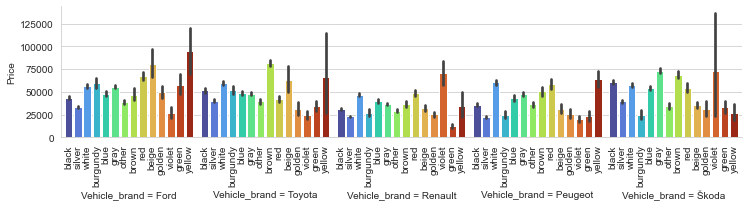

In [75]:
#Yes according to these graphs
sns.set_style('whitegrid')
g = sns.catplot(x="Colour", y="Price", col="Vehicle_brand",
                data=df3,
                kind="bar", height=3, aspect=.7, palette='turbo')
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.03)
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)

plt.show()

# Research_question5:How diffirent fuel type affect the Co2_emisssion

In [76]:
Co2_cleared=df[df["CO2_emissions"].notnull()]
Co2_cleared=Co2_cleared[Co2_cleared["Fuel_type"].notnull()]
Q1 = Co2_cleared.quantile(0.25)
Q3 = Co2_cleared.quantile(0.75)
IQR = Q3 - Q1
Co2_cleared = Co2_cleared[~((Co2_cleared < (Q1 - 1.5 * IQR)) |(Co2_cleared > (Q3 + 1.5 * IQR))).any(axis=1)]
Co2_cleared=Co2_cleared[Co2_cleared['Vehicle_brand'].isin(Top10_brands)]



<ipython-input-76-a2d58b4096d4>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Co2_cleared = Co2_cleared[~((Co2_cleared < (Q1 - 1.5 * IQR)) |(Co2_cleared > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-76-a2d58b4096d4>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Co2_cleared = Co2_cleared[~((Co2_cleared < (Q1 - 1.5 * IQR)) |(Co2_cleared > (Q3 + 1.5 * IQR))).any(axis=1)]


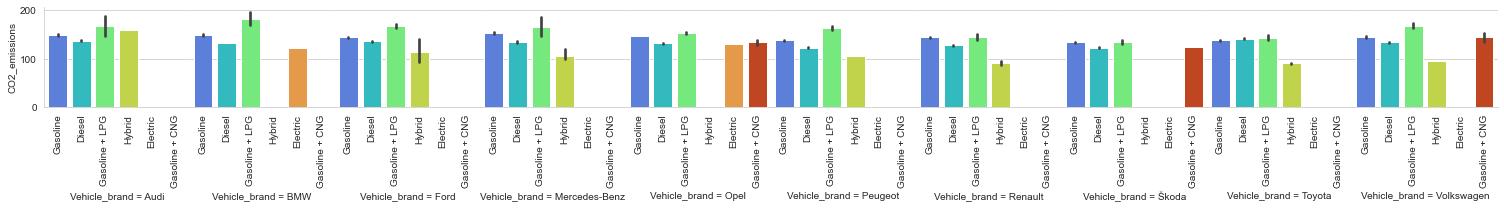

In [77]:
sns.set_style('whitegrid')
g = sns.catplot(x="Fuel_type", y="CO2_emissions", col="Vehicle_brand",
                data=Co2_cleared,
                kind="bar", height=3, aspect=.7, palette='turbo')
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.03)
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)

plt.show()

<AxesSubplot:xlabel='Fuel_type'>

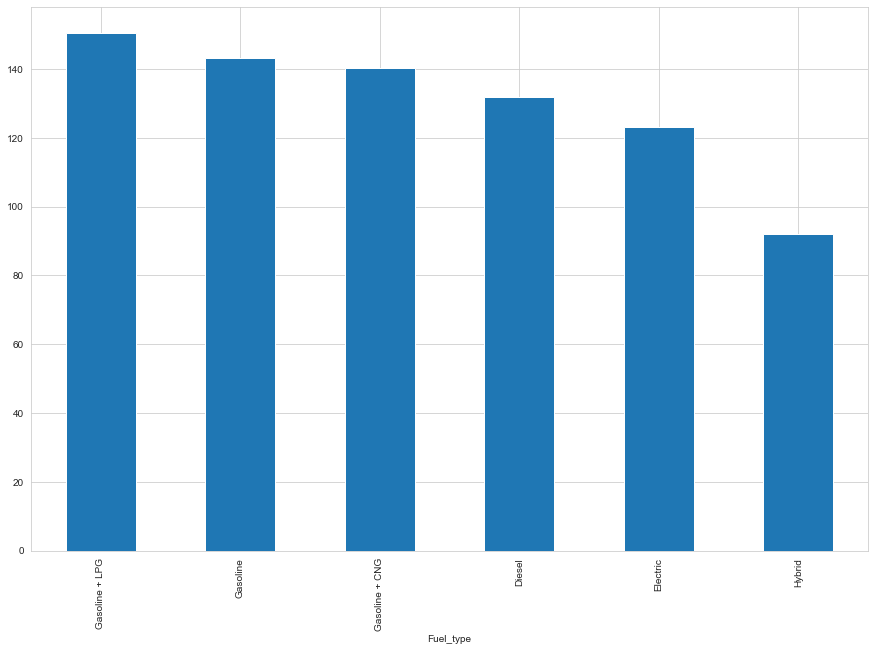

In [78]:
#Comparison between each fuel_type and co2_emissoin
Co2_cleared.groupby("Fuel_type")["CO2_emissions"].mean().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))

# Research_question7:Are newer cars decrease co2_emissions?

<AxesSubplot:xlabel='Production_year'>

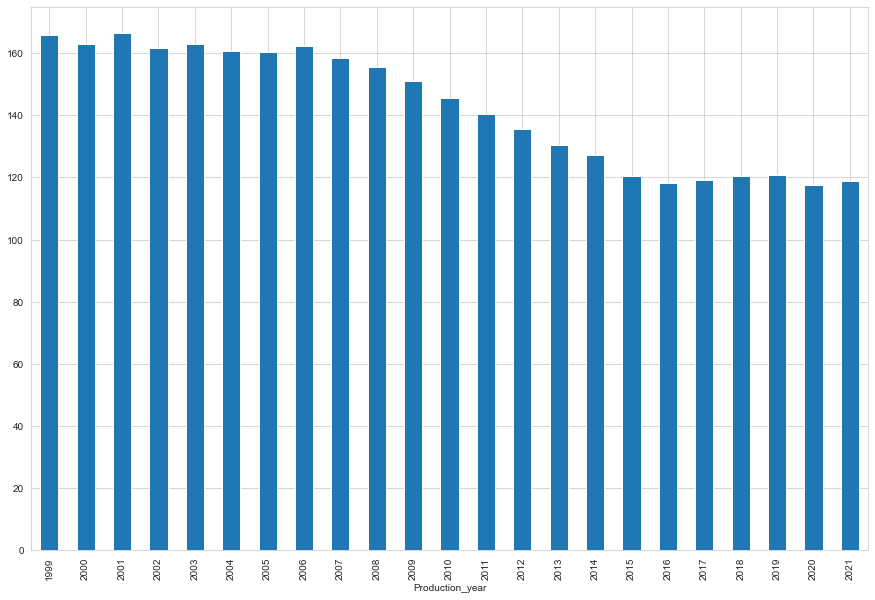

In [79]:
Co2_cleared.groupby("Production_year")["CO2_emissions"].mean().head(50).plot.bar(figsize=(15,10))

# Research_question7:Is there relation between mileage_km and transmission type for each brand?

In [80]:
#Yes listed manual cars consumed more mileage_km than automatic cars
df3 = df2
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3=df3[df3['Vehicle_brand'].isin(Top10_brands)]
brands=df3["Vehicle_brand"].unique().tolist()
mean_of_automatic_cars=[]
mean_of_manual_cars=[]
grp=df3.groupby(['Vehicle_brand'])
for i in range(len(brands)):
     selected_group = grp.get_group(brands[i])
     selected_group[selected_group['Transmission']=='Automatic']
     x=selected_group[selected_group['Transmission']=='Automatic']["Mileage_km"].mean()
     mean_of_automatic_cars.append(x)
for j in range(len(brands)):
     selected_group = grp.get_group(brands[j])
     selected_group[selected_group['Transmission']=='Manual']
     x=selected_group[selected_group['Transmission']=='Manual']["Mileage_km"].mean()
     mean_of_manual_cars.append(x)

<ipython-input-80-4a46d02277b1>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-80-4a46d02277b1>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]


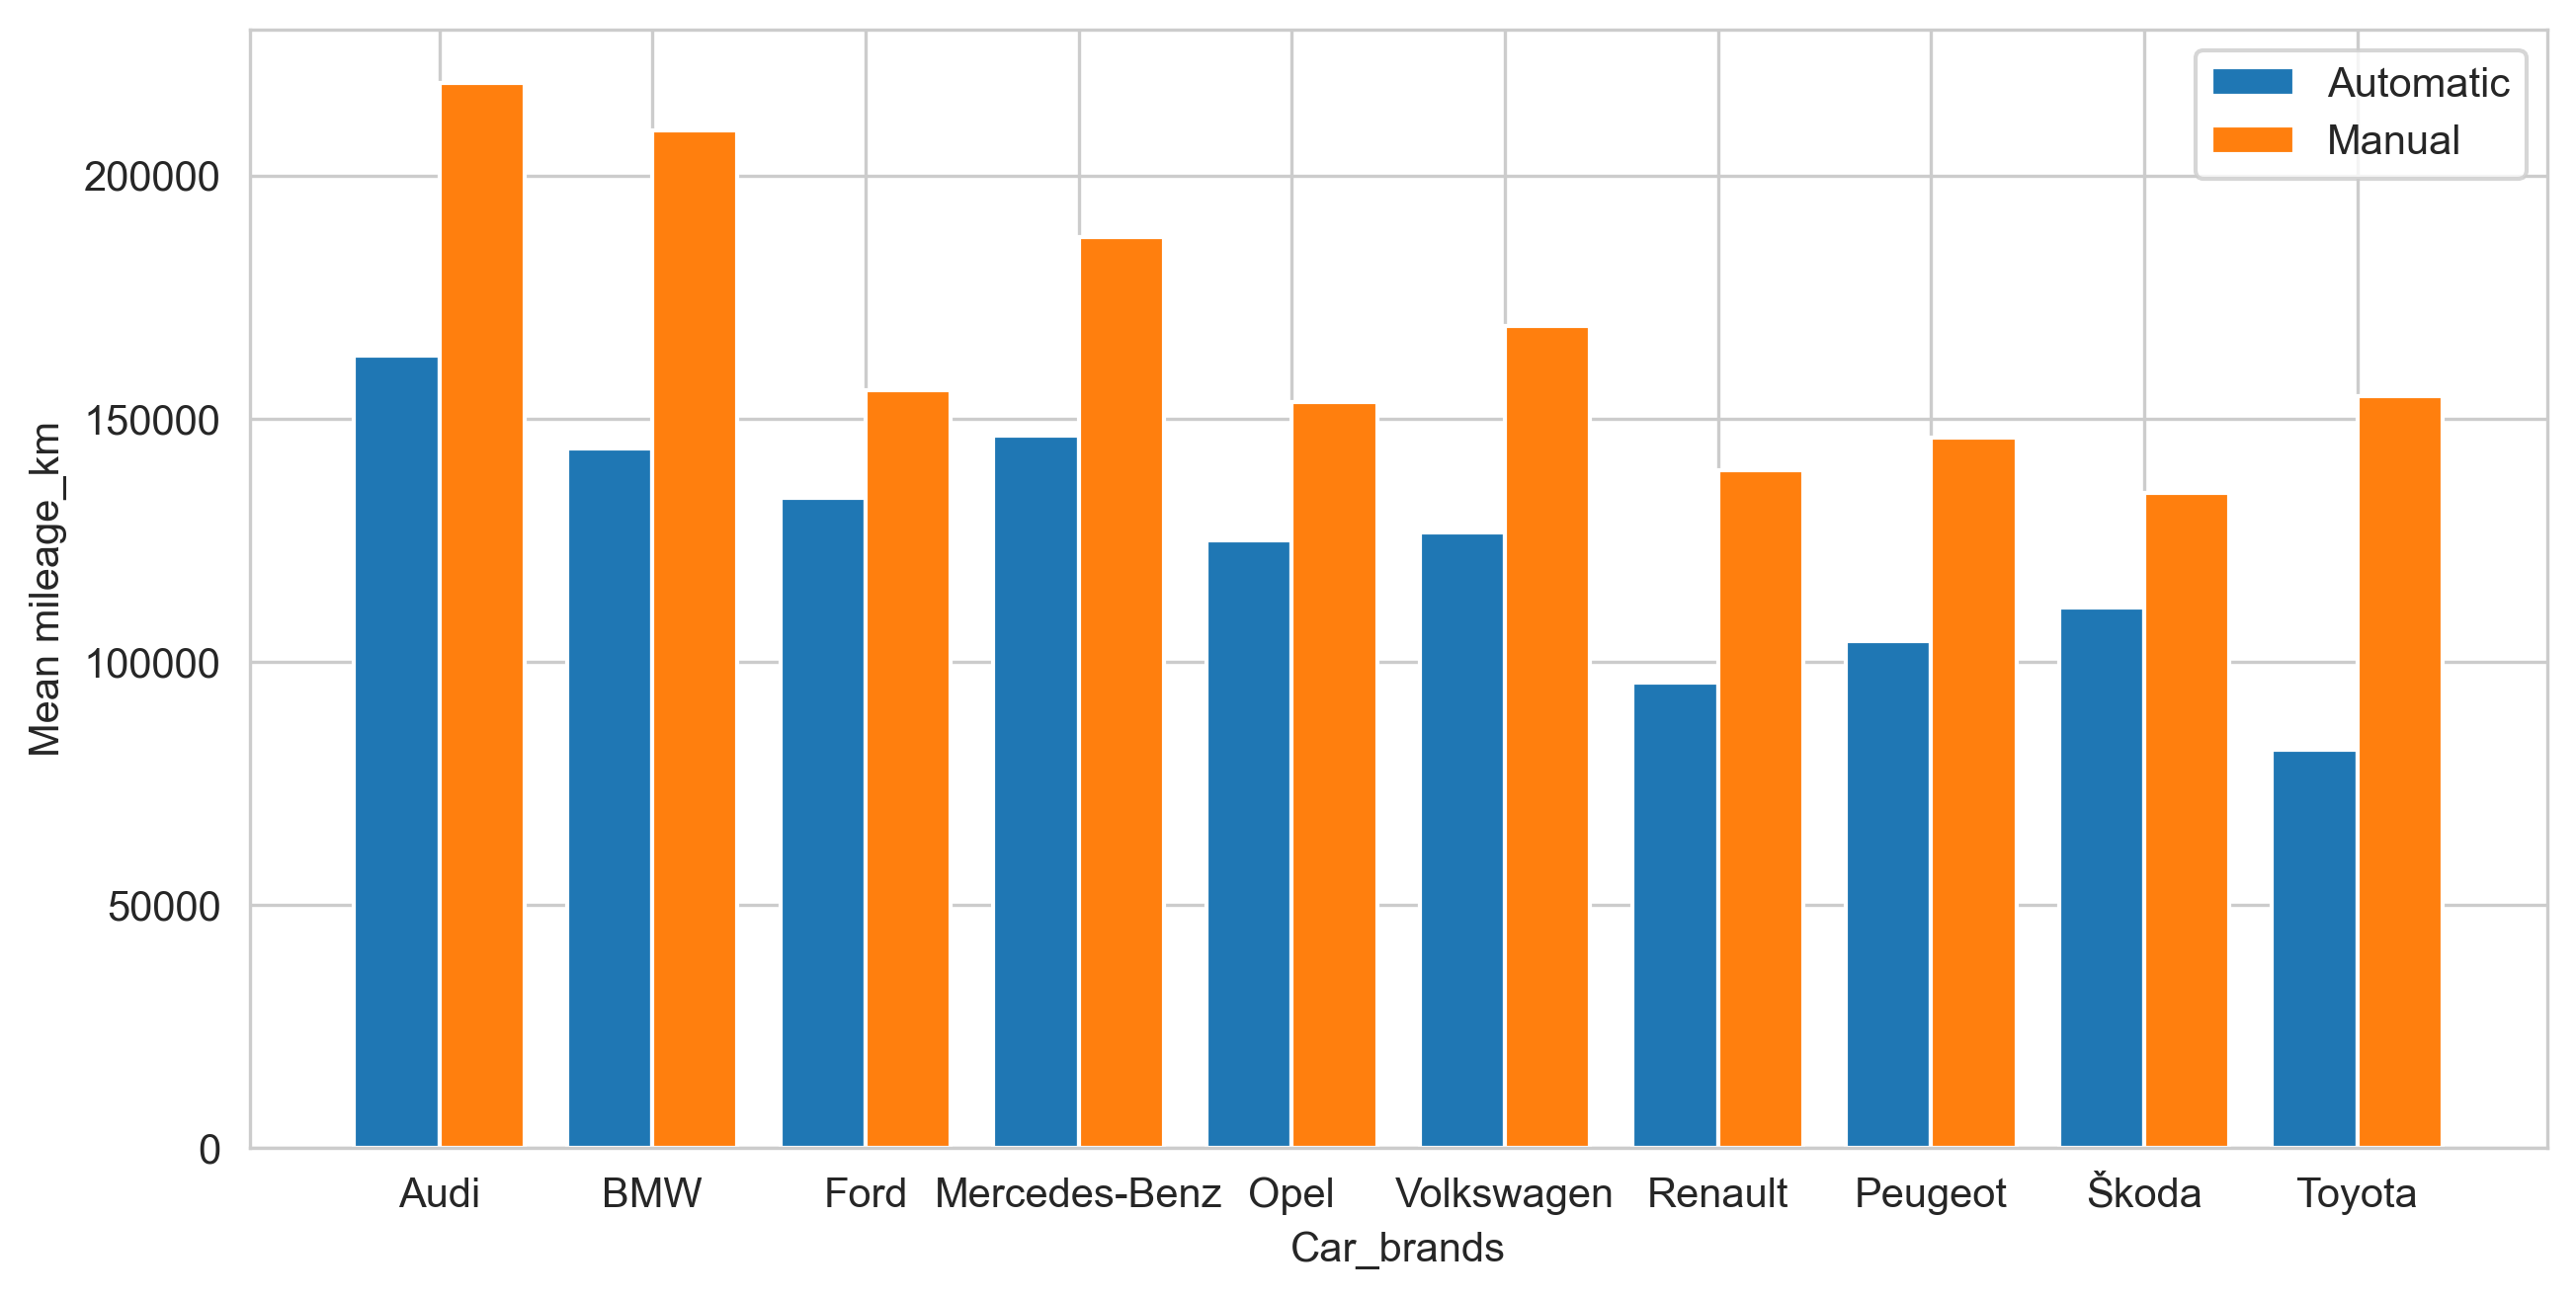

In [81]:
X =brands
X1 = mean_of_automatic_cars
X2 = mean_of_manual_cars
  
X_axis = np.arange(len(X))
cars_fig = plt.figure(figsize=(10, 5), dpi=300)
ax = cars_fig.add_subplot(1,1,1)
plt.bar(X_axis - 0.2, X1, 0.4, label = 'Automatic')
plt.bar(X_axis + 0.2, X2, 0.4, label = 'Manual')
  
plt.xticks(X_axis, X)
plt.xlabel("Car_brands")
plt.ylabel("Mean mileage_km")
plt.legend()
plt.show()

# Research question7: How diffirent car types affects car prices?

In [85]:

df2[['Price']].loc[df2['Type'] == 'small_cars'].mean()
df2[['Price']].loc[df2['Type'] == 'coupe'].mean()
df2[['Price']].loc[df2['Type'] == 'city_cars'].mean()
df2[['Price']].loc[df2['Type'] == 'convertible'].mean()
df2[['Price']].loc[df2['Type'] == 'compact'].mean()
df2[['Price']].loc[df2['Type'] == 'SUV'].mean()
df2[['Price']].loc[df2['Type'] == 'sedan'].mean()
df2[['Price']].loc[df2['Type'] == 'station_wagon'].mean()
df2[['Price']].loc[df2['Type'] == 'minivan'].mean()

Price    38554.038618
dtype: float64

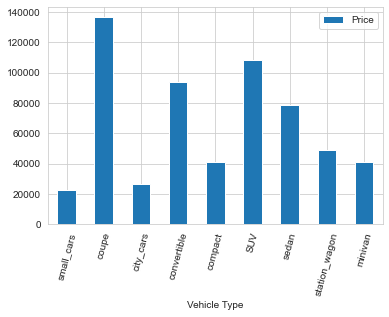

In [86]:
avrage_data = pd.DataFrame({'Vehicle Type':['small_cars', 'coupe', 'city_cars', 'convertible', 'compact','SUV', 'sedan', 'station_wagon', 'minivan'], 'Price':[22952.069956, 136497.340828, 26397.860639,93943.474599, 40925.002679,108513.364594,78463.33234,48757.177133,41224.12151]})
ax = avrage_data.plot.bar(x='Vehicle Type', y='Price', rot=75)

In [ ]:
# Arrangement from highest to lowest in price
# 1. Coupe
# 2. SUV
# 3. Convertible
# 4. Sedan
# 5. station wagon
# 6. minivian
# 7. compact
# 8. city cars
# 9. small cars